In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from kneed import KneeLocator

ModuleNotFoundError: No module named 'kneed'

In [2]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\anna\ve\scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
from kneed import KneeLocator

In [4]:
credit = pd.read_csv('BankChurners (1).csv')

In [5]:
credit.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
cols= ['Customer_Age', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Credit_Limit']

In [16]:
data = credit[cols]
data.head(8)

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit
0,45,M,High School,Married,$60K - $80K,12691.0
1,49,F,Graduate,Single,Less than $40K,8256.0
2,51,M,Graduate,Married,$80K - $120K,3418.0
3,40,F,High School,Unknown,Less than $40K,3313.0
4,40,M,Uneducated,Married,$60K - $80K,4716.0
5,44,M,Graduate,Married,$40K - $60K,4010.0
6,51,M,Unknown,Married,$120K +,34516.0
7,32,M,High School,Unknown,$60K - $80K,29081.0


In [8]:
data.Customer_Age.describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

In [9]:
data.isna()

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
10122,False,False,False,False,False,False
10123,False,False,False,False,False,False
10124,False,False,False,False,False,False
10125,False,False,False,False,False,False


In [10]:
data_adj = data.copy()

In [11]:
cat_col = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category']

In [12]:
for col in cat_col:
    labelencoder = LabelEncoder()
    data_adj[col] = labelencoder.fit_transform(data_adj[col])

In [17]:
data_adj.head(10)

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit
0,45,1,3,1,2,12691.0
1,49,0,2,2,4,8256.0
2,51,1,2,1,3,3418.0
3,40,0,3,3,4,3313.0
4,40,1,5,1,2,4716.0
5,44,1,2,1,1,4010.0
6,51,1,6,1,0,34516.0
7,32,1,3,3,2,29081.0
8,37,1,5,2,2,22352.0
9,48,1,2,2,3,11656.0


In [19]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_adj)
scaled_data = pd.DataFrame(scaled_data, columns = data_adj.columns)

In [20]:
scaled_data

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit
0,-0.165406,1.059956,-0.052637,-0.628128,-0.574182,0.446622
1,0.333570,-0.943436,-0.597678,0.727306,0.755053,-0.041367
2,0.583058,1.059956,-0.597678,-0.628128,0.090436,-0.573698
3,-0.789126,-0.943436,-0.052637,2.082739,0.755053,-0.585251
4,-0.789126,1.059956,1.037447,-0.628128,-0.574182,-0.430877
...,...,...,...,...,...,...
10122,0.458314,1.059956,-0.597678,0.727306,-1.238799,-0.509330
10123,-0.664382,1.059956,1.582489,-1.983561,-1.238799,-0.479181
10124,-0.290150,-0.943436,-0.052637,-0.628128,0.755053,-0.354626
10125,-2.036565,1.059956,-0.597678,2.082739,-1.238799,-0.368710


In [21]:
sse = []
for k in np.arange(1,10,1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=10)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

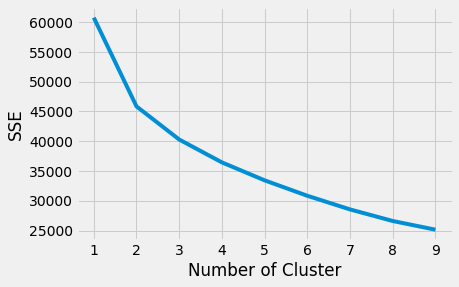

In [23]:
plt.style.use("fivethirtyeight")
plt.plot(np.arange(1,10,1), sse)
plt.xticks(np.arange(1,10,1))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.show()

In [24]:
k1 = KneeLocator(np.arange(1,10,1), sse, curve="convex", direction='decreasing')
k1.elbow

3

In [25]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=10)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=10)

In [26]:
cluster = kmeans.labels_
cluster

array([1, 2, 1, ..., 2, 1, 2])

In [27]:
scaled_data['cluster'] = cluster

In [29]:
scaled_data.head(10)

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit,cluster
0,-0.165406,1.059956,-0.052637,-0.628128,-0.574182,0.446622,1
1,0.333570,-0.943436,-0.597678,0.727306,0.755053,-0.041367,2
2,0.583058,1.059956,-0.597678,-0.628128,0.090436,-0.573698,1
3,-0.789126,-0.943436,-0.052637,2.082739,0.755053,-0.585251,2
4,-0.789126,1.059956,1.037447,-0.628128,-0.574182,-0.430877,1
5,-0.290150,1.059956,-0.597678,-0.628128,-1.238799,-0.508559,1
6,0.583058,1.059956,1.582489,-0.628128,-1.903416,2.848054,0
7,-1.787077,1.059956,-0.052637,2.082739,-0.574182,2.250034,0
8,-1.163358,1.059956,1.037447,0.727306,-0.574182,1.509634,0
9,0.208826,1.059956,-0.597678,0.727306,0.090436,0.332740,1


In [30]:
data["Cluster"] = scaled_data['cluster']
data.head(3)

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit,Cluster
0,45,M,High School,Married,$60K - $80K,12691.0,1
1,49,F,Graduate,Single,Less than $40K,8256.0,2
2,51,M,Graduate,Married,$80K - $120K,3418.0,1


In [31]:
c1 = data[data["Cluster"]==0]
c1.head(10)

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit,Cluster
6,51,M,Unknown,Married,$120K +,34516.0,0
7,32,M,High School,Unknown,$60K - $80K,29081.0,0
8,37,M,Uneducated,Single,$60K - $80K,22352.0,0
16,48,M,Post-Graduate,Single,$80K - $120K,30367.0,0
20,47,M,Doctorate,Divorced,$60K - $80K,20979.0,0
40,45,M,Graduate,Single,$80K - $120K,32426.0,0
45,49,M,Uneducated,Single,$80K - $120K,34516.0,0
48,46,M,High School,Married,$80K - $120K,19458.0,0
53,49,M,Unknown,Married,$120K +,19763.0,0
61,48,M,Graduate,Married,$60K - $80K,34516.0,0


In [39]:
means = data.groupby('Cluster').mean()
means

,Customer_Age,Credit_Limit
Cluster,,
0,46.462667,27379.796000
1,46.234136,6107.203729
2,46.370388,4635.691669


In [41]:
c1.head(3)

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit,Cluster
6,51,M,Unknown,Married,$120K +,34516.0,0
7,32,M,High School,Unknown,$60K - $80K,29081.0,0
8,37,M,Uneducated,Single,$60K - $80K,22352.0,0


In [42]:
c1_education = c1.groupby(['Education_Level']).agg({'Cluster': 'count'}).sort_values('Cluster', ascending = False)

In [43]:
c1_education

,Cluster
Education_Level,
Graduate,462
High School,287
Uneducated,236
Unknown,218
College,154
Post-Graduate,82
Doctorate,61


In [45]:
c2 = data[data["Cluster"]==1]
c2_education = c2.groupby(['Education_Level']).agg({'Cluster': 'count'}).sort_values('Cluster', ascending = False)
c2_education

,Cluster
Education_Level,
Graduate,1322
High School,902
Unknown,653
Uneducated,592
College,438
Post-Graduate,231
Doctorate,180


In [46]:
c2_gender = c2.groupby(['Gender']).agg({'Cluster': 'count'}).sort_values('Cluster', ascending = False)
c2_gender

,Cluster
Gender,
M,3322
F,996


In [47]:
c1_gender = c1.groupby(['Gender']).agg({'Cluster': 'count'}).sort_values('Cluster', ascending = False)
c1_gender

,Cluster
Gender,
M,1414
F,86


In [48]:
c1.describe()

,Customer_Age,Credit_Limit,Cluster
count,1500.000000,1500.000000,1500.0
mean,46.462667,27379.796000,0.0
std,6.925165,6591.835738,0.0
min,26.000000,15108.000000,0.0
25%,42.000000,21147.000000,0.0
50%,47.000000,27964.500000,0.0
75%,51.000000,34516.000000,0.0
max,65.000000,34516.000000,0.0


In [49]:
c2.describe()

,Customer_Age,Credit_Limit,Cluster
count,4318.000000,4318.000000,4318.0
mean,46.234136,6107.203729,1.0
std,8.299444,4134.429376,0.0
min,26.000000,1438.300000,1.0
25%,40.000000,2731.000000,1.0
50%,46.000000,4716.500000,1.0
75%,52.000000,8853.250000,1.0
max,73.000000,19281.000000,1.0


In [50]:
c3 = data[data["Cluster"]==2]
c3.describe()

,Customer_Age,Credit_Limit,Cluster
count,4309.000000,4309.000000,4309.0
mean,46.370388,4635.691669,2.0
std,8.083117,4143.917425,0.0
min,26.000000,1438.300000,2.0
25%,41.000000,2132.000000,2.0
50%,46.000000,2999.000000,2.0
75%,52.000000,5523.000000,2.0
max,68.000000,29638.000000,2.0


In [54]:
pip install prophet

  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
  Using cached Cython-0.29.30-py2.py3-none-any.whl (985 kB)Note: you may need to restart the kernel to use updated packages.
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached holidays-0.14.2-py3-none-any.whl (179 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)



You should consider upgrading via the 'd:\anna\ve\scripts\python.exe -m pip install --upgrade pip' command.


  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
Using legacy 'setup.py install' for pymeeus, since package 'wheel' is not installed.
    Running setup.py install for pymeeus: started
    Running setup.py install for pymeeus: finished with status 'done'


In [56]:
from prophet import Prophet

In [57]:
pip install pandahouse

  Created wheel for pandahouse: filename=pandahouse-0.2.7-py2.py3-none-any.whl size=5928 sha256=d78c443ebf8f94b3ebe235827e47e8141d766c04f8659a7695963bb47ec98aae
  Stored in directory: c:\users\st\appdata\local\pip\cache\wheels\2b\75\4a\22824efa98a925fce4a1f2c18e85b55eb75179dfb9e9d59f45
Successfully built pandahouse
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\anna\ve\scripts\python.exe -m pip install --upgrade pip' command.


In [58]:
import pandahouse as ph

In [59]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\anna\ve\scripts\python.exe -m pip install --upgrade pip' command.


In [61]:
from datetime import date

In [62]:
pip install holidays

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\anna\ve\scripts\python.exe -m pip install --upgrade pip' command.


In [63]:
import holidays

In [66]:
df = pd.read_excel("df (2).xlsx")

In [67]:
df

,ds,y
0,2019-01-01,19644
1,2019-01-02,22535
2,2019-01-03,24793
3,2019-01-04,24416
4,2019-01-05,24750
...,...,...
272,2019-09-30,13986
273,2019-10-01,13976
274,2019-10-02,13830
275,2019-10-03,13453


In [68]:
df.to_excel("./df (2).xlsx", sheet_name='Data', index=False, encoding="cp1251")

In [69]:
holidays_dict = holidays.RU(years=(2019, 2020, 2021))
df_holidays = pd.DataFrame.from_dict(holidays_dict, orient='index') \
    .reset_index()
df_holidays = df_holidays.rename({'index':'ds', 0:'holiday'}, axis ='columns')
df_holidays['ds'] = pd.to_datetime(df_holidays.ds)
df_holidays = df_holidays.sort_values(by=['ds'])
df_holidays = df_holidays.reset_index(drop=True)
df_holidays

,ds,holiday
0,2019-01-01,Новый год
1,2019-01-02,Новый год
2,2019-01-03,Новый год
3,2019-01-04,Новый год
4,2019-01-05,Новый год
5,2019-01-06,Новый год
6,2019-01-07,Православное Рождество
7,2019-01-08,Новый год
8,2019-02-23,День защитника отечества
9,2019-03-08,День женщин


In [70]:
predictions = 30
train_df = df[:-predictions]

In [71]:
m = Prophet()
m.fit(train_df)

21:06:03 - cmdstanpy - INFO - Chain [1] start processing
21:06:03 - cmdstanpy - INFO - Chain [1] done processing


In [72]:
m = Prophet(holidays= df_holidays, daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=False)
m.fit(train_df)

21:10:03 - cmdstanpy - INFO - Chain [1] start processing
21:10:03 - cmdstanpy - INFO - Chain [1] done processing


In [73]:
future = m.make_future_dataframe(periods=predictions)
forecast = m.predict(future)

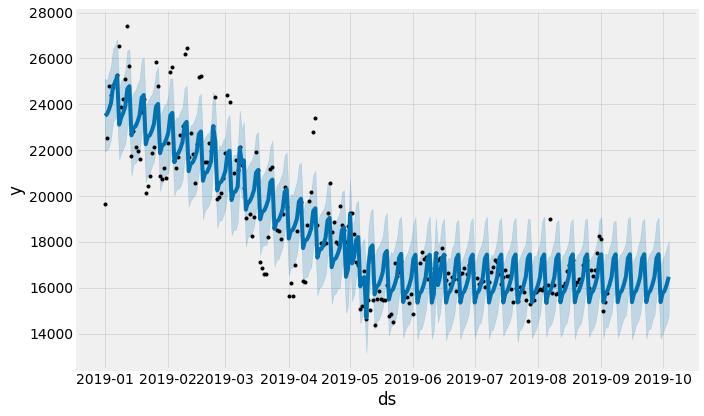

In [74]:
m.plot(forecast);

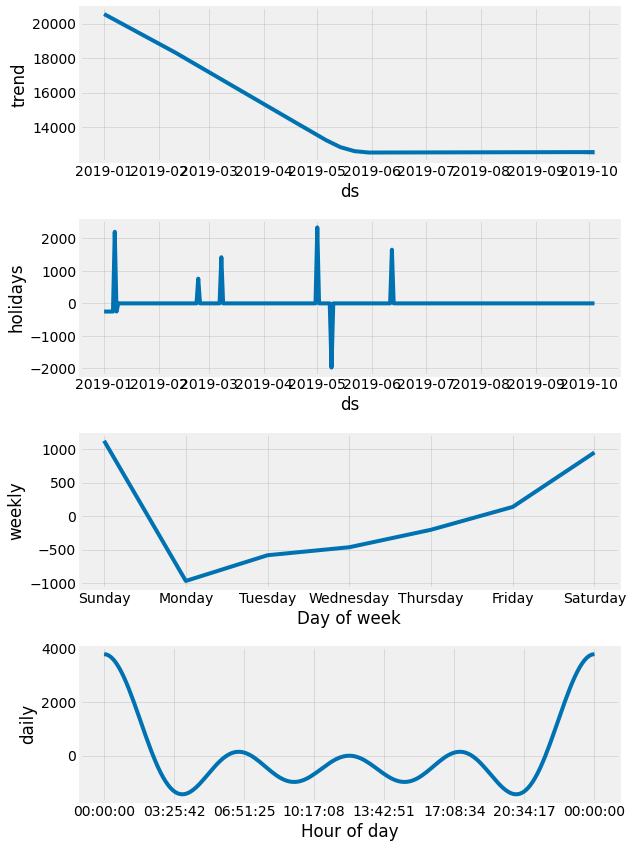

In [75]:
m.plot_components(forecast);

In [76]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\anna\ve\scripts\python.exe -m pip install --upgrade pip' command.


In [77]:
# Рисуем график с границами прогноза
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
iplot([
    go.Scatter(x=df['ds'], y=df['y'], name='fact'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='prediction'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=forecast['ds'], y=forecast['trend'], name='trend')
])

In [78]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print('MAPE (средняя абсолютная ошибка в процентах) – ', np.mean(abs(cmp_df[-predictions:]['p'])),'%')
print('MAE (средняя абсолютная ошибка) – ', np.mean(abs(cmp_df[-predictions:]['e'])))

MAPE (средняя абсолютная ошибка в процентах) –  9.003945498434986 %
MAE (средняя абсолютная ошибка) –  1317.8806404641723


In [79]:
prediction_days = 90
final_train_df = df
f = Prophet(holidays=df_holidays, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False)
f.fit(final_train_df)
final_future = f.make_future_dataframe(periods=prediction_days)
final_forecast=f.predict(final_future)

21:28:55 - cmdstanpy - INFO - Chain [1] start processing
21:28:55 - cmdstanpy - INFO - Chain [1] done processing


In [80]:
final_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,Православное Рождество,Православное Рождество_lower,Православное Рождество_upper,Праздник Весны и Труда,Праздник Весны и Труда_lower,Праздник Весны и Труда_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,24372.466258,21875.302062,25115.231354,24372.466258,24372.466258,-873.733372,-873.733372,-873.733372,-287.002269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23498.732886
1,2019-01-02,24314.450199,22007.872723,25211.248449,24314.450199,24314.450199,-749.914404,-749.914404,-749.914404,-287.002269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23564.535795
2,2019-01-03,24256.434140,22062.482407,25256.401055,24256.434140,24256.434140,-540.855425,-540.855425,-540.855425,-287.002269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23715.578715
3,2019-01-04,24198.418081,22510.032828,25656.868497,24198.418081,24198.418081,-186.605578,-186.605578,-186.605578,-287.002269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24011.812503
4,2019-01-05,24140.402021,23268.455041,26380.654639,24140.402021,24140.402021,691.496444,691.496444,691.496444,-287.002269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24831.898466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2019-12-29,14289.205506,13803.125935,17207.867018,13787.042249,14800.139949,1175.453495,1175.453495,1175.453495,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15464.659001
363,2019-12-30,14277.381079,11704.063070,15122.199450,13766.350207,14799.218706,-950.852508,-950.852508,-950.852508,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13326.528570
364,2019-12-31,14265.556651,11610.012913,15092.047200,13748.745783,14797.004879,-873.733372,-873.733372,-873.733372,-287.002269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13391.823279
365,2020-01-01,14253.732224,11835.535898,15195.696538,13732.174192,14794.145086,-749.914404,-749.914404,-749.914404,-287.002269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13503.817820


In [81]:
final_forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,Православное Рождество,Православное Рождество_lower,Православное Рождество_upper,Праздник Весны и Труда,Праздник Весны и Труда_lower,Праздник Весны и Труда_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
357,2019-12-24,14348.327643,12037.576640,15376.109010,13892.988078,14810.903013,-586.731102,-586.731102,-586.731102,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13761.596540
358,2019-12-25,14336.503215,12254.732542,15504.415990,13870.798320,14810.227906,-462.912135,-462.912135,-462.912135,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13873.591081
359,2019-12-26,14324.678788,12403.377735,15774.652502,13847.649043,14808.281421,-253.853155,-253.853155,-253.853155,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14070.825633
360,2019-12-27,14312.854361,12802.285845,16043.634026,13828.025815,14806.178687,100.396692,100.396692,100.396692,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14413.251053
361,2019-12-28,14301.029933,13684.191544,16942.566616,13806.890198,14803.240992,978.498714,978.498714,978.498714,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15279.528647
362,2019-12-29,14289.205506,13803.125935,17207.867018,13787.042249,14800.139949,1175.453495,1175.453495,1175.453495,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15464.659001
363,2019-12-30,14277.381079,11704.063070,15122.199450,13766.350207,14799.218706,-950.852508,-950.852508,-950.852508,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13326.528570
364,2019-12-31,14265.556651,11610.012913,15092.047200,13748.745783,14797.004879,-873.733372,-873.733372,-873.733372,-287.002269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13391.823279
365,2020-01-01,14253.732224,11835.535898,15195.696538,13732.174192,14794.145086,-749.914404,-749.914404,-749.914404,-287.002269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13503.817820
366,2020-01-02,14241.907796,12111.698455,15494.762084,13713.389545,14792.948163,-540.855425,-540.855425,-540.855425,-287.002269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13701.052372


In [82]:
final_forecast.to_excel("./app_forecast.xlsx", sheet_name='Data', index=False, encoding="cp1251")

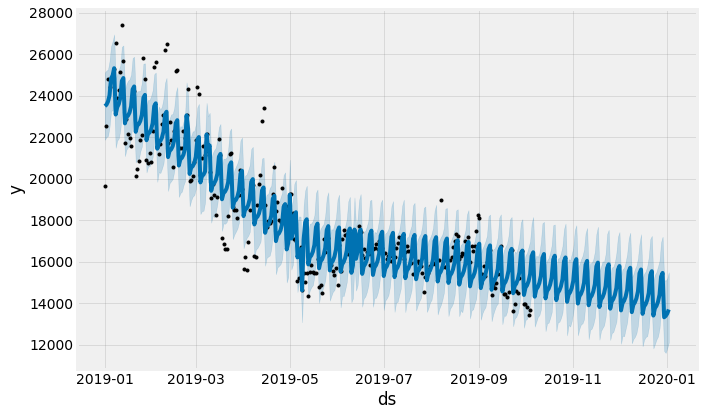

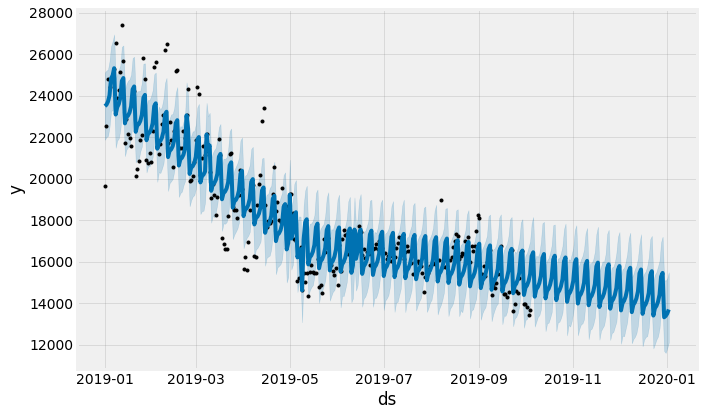

In [83]:
f.plot(final_forecast)